In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, sys, shutil, random
root_address = '/content/drive/MyDrive/Diabetic Retinopathy 224x224 Gaussian Filtered'

In [ ]:
!pip install imagehash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.4 MB/s eta 0:00:00


In [ ]:
import imagehash
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [ ]:
data_address = f'{root_address}/train.csv'
data = pd.read_csv(data_address)
data.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


<Axes: xlabel='diagnosis', ylabel='count'>

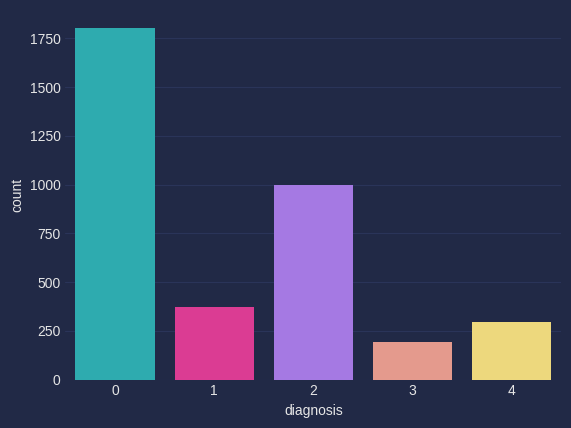

In [ ]:
sns.countplot(
    data=data,
    x='diagnosis'
)

<Axes: xlabel='diagnosis', ylabel='count'>

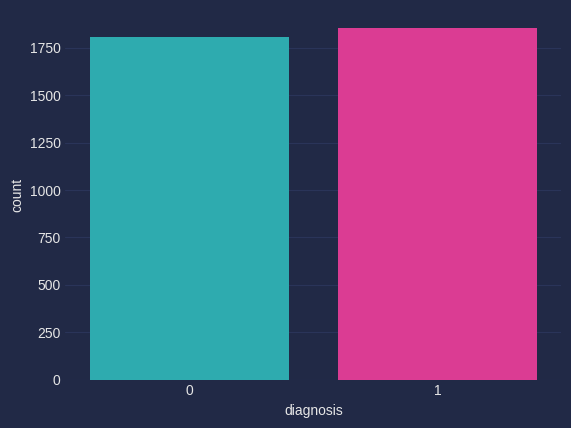

In [ ]:
data2 = data.copy()

# select and merge every category other than `No_DR`
data2['diagnosis'] = data2['diagnosis'] > 0
data2['diagnosis'] = data2['diagnosis'].astype('int32')

# plot the distribution of categories
sns.countplot(data=data2, x='diagnosis')

In [ ]:
test_frac, val_frac = 0.25, 0.15

# separate `val` data from the `whole`
_, val = train_test_split(
    data2,
    test_size=val_frac,
    stratify=data2['diagnosis']
)

# separate `test` and `train` from the remaining
train, test = train_test_split(
    _,
    test_size=test_frac/(1-val_frac), # to have the same frac on the `whole`
    stratify=_['diagnosis']
)

# verify
print(f'{train.shape}, {test.shape}, {val.shape}\n')

(2196, 2), (916, 2), (550, 2)



In [ ]:
import os
import random
import glob
from sklearn.model_selection import train_test_split

# Set the path to the main folder containing the subfolders
main_folder_path = "/content/drive/MyDrive/Diabetic Retinopathy 224x224 Gaussian Filtered/gaussian_filtered_images/gaussian_filtered_images"

# List all the subfolders within the main folder
subfolders = [folder for folder in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, folder))]

# Initialize lists to store image paths and labels
image_paths = []
labels = []

# Iterate over each subfolder and collect image paths and labels
for label, folder in enumerate(subfolders):
    folder_path = os.path.join(main_folder_path, folder)
    file_paths = glob.glob(os.path.join(folder_path, "*.png"))  # Assuming the images are in JPG format

    image_paths.extend(file_paths)
    labels.extend([label] * len(file_paths))

# Split the dataset into training and testing sets
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Print the number of samples in each set
print("Training set size:", len(train_image_paths))
print("Testing set size:", len(test_image_paths))


Training set size: 2978
Testing set size: 745


Training set size: 2978
Testing set size: 745


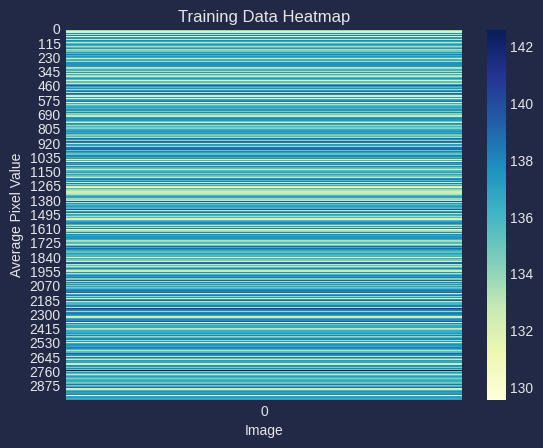

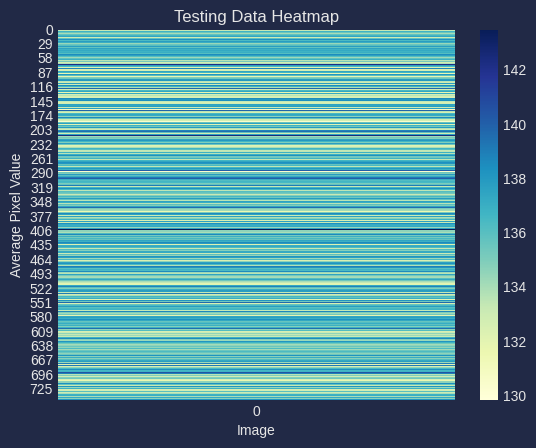

In [ ]:
import cv2
import os
import random
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set the path to the main folder containing the subfolders
main_folder_path = "/content/drive/MyDrive/Diabetic Retinopathy 224x224 Gaussian Filtered/gaussian_filtered_images/gaussian_filtered_images"

# List all the subfolders within the main folder
subfolders = [folder for folder in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, folder))]

# Initialize lists to store image paths and labels
image_paths = []
labels = []

# Iterate over each subfolder and collect image paths and labels
for label, folder in enumerate(subfolders):
    folder_path = os.path.join(main_folder_path, folder)
    file_paths = glob.glob(os.path.join(folder_path, "*.png"))  # Assuming the images are in PNG format

    image_paths.extend(file_paths)
    labels.extend([label] * len(file_paths))

# Split the dataset into training and testing sets
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Print the number of samples in each set
print("Training set size:", len(train_image_paths))
print("Testing set size:", len(test_image_paths))

# Calculate the average pixel values for each image
train_heatmap_data = []
test_heatmap_data = []

# Iterate over training image paths and calculate average pixel values
for image_path in train_image_paths:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    average_pixel_value = np.mean(image)
    train_heatmap_data.append(average_pixel_value)

# Iterate over testing image paths and calculate average pixel values
for image_path in test_image_paths:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    average_pixel_value = np.mean(image)
    test_heatmap_data.append(average_pixel_value)

# Create a heatmap for the training data
train_heatmap = np.reshape(train_heatmap_data, (-1, 1))
sns.heatmap(train_heatmap, cmap='YlGnBu')
plt.title('Training Data Heatmap')
plt.xlabel('Image')
plt.ylabel('Average Pixel Value')
plt.show()

# Create a heatmap for the testing data
test_heatmap = np.reshape(test_heatmap_data, (-1, 1))
sns.heatmap(test_heatmap, cmap='YlGnBu')
plt.title('Testing Data Heatmap')
plt.xlabel('Image')
plt.ylabel('Average Pixel Value')
plt.show()


In [ ]:
import cv2
import os
import random
import glob
from sklearn.model_selection import train_test_split

# Set the path to the main folder containing the subfolders
main_folder_path = "/content/drive/MyDrive/Diabetic Retinopathy 224x224 Gaussian Filtered/gaussian_filtered_images/gaussian_filtered_images"

# List all the subfolders within the main folder
subfolders = [folder for folder in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, folder))]

# Initialize lists to store image paths and labels
image_paths = []
labels = []

# Iterate over each subfolder and collect image paths and labels
for label, folder in enumerate(subfolders):
    folder_path = os.path.join(main_folder_path, folder)
    file_paths = glob.glob(os.path.join(folder_path, "*.png"))  # Assuming the images are in PNG format

    image_paths.extend(file_paths)
    labels.extend([label] * len(file_paths))

# Split the dataset into training and testing sets
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Print the number of samples in each set
print("Training set size:", len(train_image_paths))
print("Testing set size:", len(test_image_paths))

# Apply CLAHE to the images
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Iterate over training image paths and apply CLAHE
for i, image_path in enumerate(train_image_paths):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = clahe.apply(image)
    train_image_paths[i] = image

# Iterate over testing image paths and apply CLAHE
for i, image_path in enumerate(test_image_paths):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = clahe.apply(image)
    test_image_paths[i] = image


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers import *
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# def build_generator(input_shape, num_classes):
#     noise = Input(shape=input_shape)
#     label = Input(shape=(1,), dtype=tf.int32)
#     label_embedding = Embedding(num_classes, 50)(label)
#     label_embedding = Flatten()(label_embedding)
#     merged_input = Concatenate()([noise, label_embedding])

#     x = Dense(7 * 7 * 128, activation="relu")(merged_input)
#     x = Reshape((7, 7, 128))(x)
#     x = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same", activation="relu")(x)
#     x = Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same", activation="relu")(x)
#     x = Conv2DTranspose(1, (7, 7), padding="same", activation="tanh")(x)

#     model = Model(inputs=[noise, label], outputs=x)
#     return model


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Set hyperparameters
latent_dim = 100
num_classes = 10
image_shape = (28, 28, 1)
epochs = 10
batch_size = 64
save_interval = 5

# Load and preprocess the MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32")
x_train = (x_train - 127.5) / 127.5  # Normalize images to [-1, 1]
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

# Build the generator network
def build_generator(latent_dim, num_classes):
    noise = layers.Input(shape=(latent_dim,))
    label = layers.Input(shape=(num_classes,))

    x = layers.Concatenate()([noise, label])
    x = layers.Dense(256, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(512, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(28 * 28 * 1, activation="tanh")(x)
    generated_image = layers.Reshape(image_shape)(x)

    model = models.Model([noise, label], generated_image)
    return model

# Build the discriminator network
def build_discriminator(image_shape, num_classes):
    image = layers.Input(shape=image_shape)
    label = layers.Input(shape=(num_classes,))

    x = layers.Flatten()(image)
    x = layers.Concatenate()([x, label])
    x = layers.Dense(512, activation="relu")(x)
    x = layers.Dense(256, activation="relu")(x)
    validity = layers.Dense(1, activation="sigmoid")(x)

    model = models.Model([image, label], validity)
    return model

# Build the CGAN model
def build_cgan(generator, discriminator):
    noise = layers.Input(shape=(latent_dim,))
    label = layers.Input(shape=(num_classes,))
    generated_image = generator([noise, label])
    validity = discriminator([generated_image, label])

    model = models.Model([noise, label], validity)
    return model

# Build the generator and discriminator networks
generator = build_generator(latent_dim, num_classes)
discriminator = build_discriminator(image_shape, num_classes)

# Build the CGAN model
cgan = build_cgan(generator, discriminator)

# Compile the CGAN model
discriminator.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.5))
discriminator.trainable = False
cgan.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.5))

# Training loop
num_batches = x_train.shape[0] // batch_size
for epoch in range(epochs):
    for batch in range(num_batches):
        # Train the discriminator
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_images = x_train[idx]
        labels = y_train[idx]
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_images = generator.predict([noise, labels])

        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))
        real_loss = discriminator.train_on_batch([real_images, labels], real_labels)
        fake_loss = discriminator.train_on_batch([generated_images, labels], fake_labels)
        discriminator_loss = 0.5 * np.add(real_loss, fake_loss)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generator_loss = cgan.train_on_batch([noise, labels], real_labels)

        # Print the progress
        print(f"Epoch: {epoch+1}/{epochs}, Batch: {batch+1}/{num_batches}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

    # Generate and save sample images
    if (epoch + 1) % save_interval == 0:
        num_samples = 10
        noise = np.random.normal(0, 1, (num_samples, latent_dim))
        labels = np.eye(num_classes)[np.arange(num_samples) % num_classes]
        generated_images = generator.predict([noise, labels])

        # Rescale images to [0, 1]
        generated_images = (generated_images + 1) / 2.0

        # Save sample images
        os.makedirs("samples", exist_ok=True)
        for i in range(num_samples):
            plt.imsave(f"samples/sample_{epoch+1}_{i}.png", generated_images[i].reshape(28, 28), cmap="gray")

# Save the generator model
# generator.save("generator_model.h5")


11490434/11490434 [==============================] - 0s 0us/step


Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 12ms/step
Epoch: 8/10, Batch: 313/937, Discriminator Loss: 0.7011221945285797, Generator Loss: 0.7119876742362976
2/2 [==============================] - 0s 8ms/step
Epoch: 8/10, Batch: 314/937, Discriminator Loss: 0.6858304142951965, Generator Loss: 0.7214379906654358
2/2 [==============================] - 0s 12ms/step
Epoch: 8/10, Batch: 315/937, Discriminator Loss: 0.6683746576309204, Generator Loss: 0.7223520278930664
2/2 [==============================] - 0s 7ms/step
Epoch: 8/10, Batch: 316/937, Discriminator Loss: 0.6938644051551819, Generator Loss: 0.7410084009170532
2/2 [==============================] - 0s 7ms/step
Epoch: 8/10, Batch: 317/937, Discriminator Loss: 0.6790716052055359, Generator Loss: 0.7204815745353699
2/2 [==============================] - 0s 13ms/step
Epoch: 8/10, Batch: 318/937, Discriminator Loss: 0.6852698922157288, Generator Loss: 0.7091518044471741
2/2 [===========

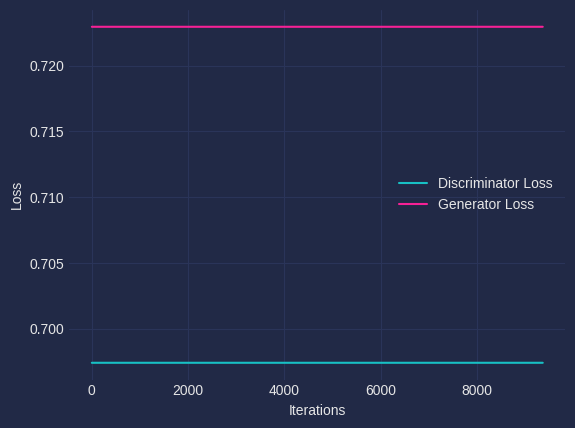

1/1 [==============================] - 0s 24ms/step


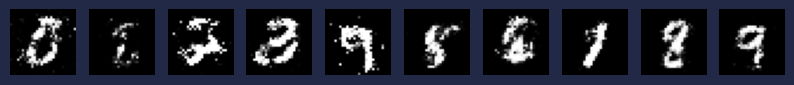

In [ ]:
# Create lists to store loss values
discriminator_losses = []
generator_losses = []

# Training loop
for epoch in range(epochs):
    for batch in range(num_batches):
        # ... Rest of the code ...

        # Store the loss values
        discriminator_losses.append(discriminator_loss)
        generator_losses.append(generator_loss)

    # ... Rest of the code ...

# Plot the loss curve
plt.plot(range(len(discriminator_losses)), discriminator_losses, label='Discriminator Loss')
plt.plot(range(len(generator_losses)), generator_losses, label='Generator Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize generated images
num_samples = 10
noise = np.random.normal(0, 1, (num_samples, latent_dim))
labels = np.eye(num_classes)[np.arange(num_samples) % num_classes]
generated_images = generator.predict([noise, labels])

fig, axes = plt.subplots(1, num_samples, figsize=(10, 1))
for i in range(num_samples):
    axes[i].imshow(generated_images[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Set the path to the directory containing the images
image_dir = "/content/drive/MyDrive/Diabetic Retinopathy 224x224 Gaussian Filtered/gaussian_filtered_images/gaussian_filtered_images"

# Set the input image size for InceptionV3
input_size = (224, 224)

# Load the pre-trained InceptionV3 model
input_tensor = Input(shape=(input_size[0], input_size[1], 3))
inception_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# Create a new model with InceptionV3 as the base and outputting the activation features
inception_features_model = Model(inputs=inception_model.input, outputs=inception_model.get_layer('avg_pool').output)

# Preprocess the images for InceptionV3
def preprocess_images(images):
    preprocessed_images = []
    for image in images:
        image = tf.image.resize(image, input_size)
        image = preprocess_input(image)
        preprocessed_images.append(image)
    return np.array(preprocessed_images)

# Load and preprocess the images
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
images = [plt.imread(image_path) for image_path in image_paths]
preprocessed_images = preprocess_images(images)

# Extract features using InceptionV3
features = inception_features_model.predict(preprocessed_images)

# Print the shape of the features
print("Features shape:", features.shape)


ValueError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def resnet_block(inputs, filters, strides=1, use_projection=False):
    # Identity mapping
    identity = inputs

    # First convolutional layer
    x = layers.Conv2D(filters, kernel_size=1, strides=strides)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    # Second convolutional layer
    x = layers.Conv2D(filters, kernel_size=3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    # Third convolutional layer
    x = layers.Conv2D(filters * 4, kernel_size=1)(x)
    x = layers.BatchNormalization()(x)

    # Projection shortcut to match dimensions
    if use_projection:
        identity = layers.Conv2D(filters * 4, kernel_size=1, strides=strides)(identity)
        identity = layers.BatchNormalization()(identity)

    # Add the identity and residual
    x = layers.Add()([x, identity])
    x = layers.Activation("relu")(x)
    return x


def build_resnet200(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Initial convolutional layer
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

    # Residual blocks
    x = resnet_block(x, filters=64, use_projection=True)
    for _ in range(2):
        x = resnet_block(x, filters=64)

    x = resnet_block(x, filters=128, strides=2, use_projection=True)
    for _ in range(3):
        x = resnet_block(x, filters=128)

    x = resnet_block(x, filters=256, strides=2, use_projection=True)
    for _ in range(22):
        x = resnet_block(x, filters=256)

    x = resnet_block(x, filters=512, strides=2, use_projection=True)
    for _ in range(35):
        x = resnet_block(x, filters=512)

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, x)
    return model

# Example usage
input_shape = (224, 224, 3)
num_classes = 1000
model = build_resnet200(input_shape, num_classes)
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 112, 112, 64  9472        ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_284 (Batch  (None, 112, 112, 64  256        ['conv2d_282[0][0]']             
 Normalization)                 )                                                           

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Set hyperparameters
num_classes = 10
input_shape = (224, 224, 3)
epochs = 100
batch_size = 32

# Build ResNet-200 model
def build_resnet200(input_shape, num_classes):
    # Define ResNet-200 model architecture using TensorFlow or Keras
    # ...

# Load and preprocess the dataset
# ...

# Split the dataset into training and testing sets
# ...

# Build the ResNet-200 model
model = build_resnet200(input_shape, num_classes)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

# Train the model
model.fit(
    train_images, train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(test_images, test_labels)
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)



IndentationError: ignored

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models

# Set hyperparameters
num_classes = 10
input_shape = (224, 224, 3)
epochs = 100
batch_size = 32

# Build ResNet-200 model
def build_resnet200(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Initial convolutional layer
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

    # Residual blocks
    # ...

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, x)
    return model

# Define ResNet-200 model architecture using TensorFlow or Keras
model = build_resnet200(input_shape, num_classes)

# Load and preprocess the dataset
# Assuming you have your own implementation to load and preprocess the dataset

# Split the dataset into training and testing sets
# Assuming you have your own implementation to split the dataset into training and testing sets

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

# Train the model
model.fit(
    train_image_paths, train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(test_image_paths, test_labels)
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_image_paths, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


ValueError: ignored

In [ ]:
from keras.applications.resnet_v2 import ResNet200V2
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator

# Load ResNet200V2 model with pre-trained weights
resnet200_model = ResNet200V2(weights='imagenet', include_top=False)

# Add custom layers for classification
x = resnet200_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create a new model with ResNet200V2 as the base and outputting the predictions
model = Model(inputs=resnet200_model.input, outputs=predictions)

# Freeze the pre-trained weights
for layer in resnet200_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess the data using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

# Train the model
model.fit(train_generator,
          steps_per_epoch=train_generator.n // batch_size,
          epochs=num_epochs,
          validation_data=validation_generator,
          validation_steps=validation_generator.n // batch_size)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Load ResNet50 model with pre-trained weights
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on your dataset
model.fit(train_image_paths, train_labels, epochs=10, validation_data=(test_image_paths, test_labels))


ValueError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build ResNet-50 model
def build_resnet50(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Initial convolutional layer
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

    # Residual blocks
    x = resnet_block(x, filters=64, strides=1, use_projection=True)
    for _ in range(2):
        x = resnet_block(x, filters=64)

    x = resnet_block(x, filters=128, strides=2, use_projection=True)
    for _ in range(3):
        x = resnet_block(x, filters=128)

    x = resnet_block(x, filters=256, strides=2, use_projection=True)
    for _ in range(5):
        x = resnet_block(x, filters=256)

    x = resnet_block(x, filters=512, strides=2, use_projection=True)
    for _ in range(3):
        x = resnet_block(x, filters=512)

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, x)
    return model

# Define the ResNet block
def resnet_block(inputs, filters, strides=1, use_projection=False):
    identity = inputs

    # First convolutional layer
    x = layers.Conv2D(filters, kernel_size=1, strides=strides)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    # Second convolutional layer
    x = layers.Conv2D(filters, kernel_size=3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    # Third convolutional layer
    x = layers.Conv2D(filters * 4, kernel_size=1)(x)
    x = layers.BatchNormalization()(x)

    # Projection shortcut to match dimensions
    if use_projection:
        identity = layers.Conv2D(filters * 4, kernel_size=1, strides=strides)(identity)
        identity = layers.BatchNormalization()(identity)

    # Add the identity and residual
    x = layers.Add()([x, identity])
    x = layers.Activation("relu")(x)
    return x

# Example usage
input_shape = (224, 224, 3)
num_classes = 1000
model = build_resnet50(input_shape, num_classes)
model.summary()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the image data directories
train_data_dir = '/content/drive/MyDrive/Diabetic Retinopathy 224x224 Gaussian Filtered/gaussian_filtered_images/gaussian_filtered_images'
test_data_dir = '/content/drive/MyDrive/Diabetic Retinopathy 224x224 Gaussian Filtered/gaussian_filtered_images/gaussian_filtered_images'

# Set the image size and batch size
image_size = (224, 224)
batch_size = 32

# Set the number of classes
num_classes = 5

# Create ImageDataGenerators to load and preprocess the images
train_data_generator = ImageDataGenerator(rescale=1.0/255)
test_data_generator = ImageDataGenerator(rescale=1.0/255)

# Load and preprocess the training images
train_generator = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

# Load and preprocess the testing images
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

# Load ResNet50 model with pre-trained weights
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on your dataset
epochs = 1
model.fit(train_generator, epochs=epochs, validation_data=test_generator)


Found 3723 images belonging to 8 classes.
Found 3723 images belonging to 8 classes.


InvalidArgumentError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Conv2D,
    Conv2DTranspose,
    BatchNormalization,
    Activation,
    Add,
    UpSampling2D,
    concatenate,
)

# Define DeepLabv3Plus
def DeepLabv3Plus(input_shape, num_classes):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze base model
    for layer in base_model.layers:
        layer.trainable = False

    # DeepLabv3+ architecture
    x = base_model.output
    low_level_features = base_model.get_layer('conv2_block3_out').output

    x = Conv2D(256, (1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    low_level_features = Conv2D(48, (1, 1), padding='same')(low_level_features)  # Adjusted channels to 48
    low_level_features = BatchNormalization()(low_level_features)
    low_level_features = Activation('relu')(low_level_features)

    x = UpSampling2D((4, 4))(x)
    x = concatenate([x, low_level_features])
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(num_classes, (1, 1), activation='softmax')(x)
    x = Conv2DTranspose(num_classes, (4, 4), strides=(2, 2), padding='same')(x)  # Adjusted transpose convolution size

    model = Model(inputs=base_model.input, outputs=x)

    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 10

# Create DeepLabv3+ model
deeplabv3plus_model = DeepLabv3Plus(input_shape, num_classes)


In [ ]:
def DeepLabv3Plus(input_shape, num_classes):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze base model
    for layer in base_model.layers:
        layer.trainable = False

    # DeepLabv3+ architecture
    x = base_model.output
    low_level_features = base_model.get_layer('conv2_block3_out').output

    x = Conv2D(256, (1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    low_level_features = Conv2D(48, (1, 1), padding='same')(low_level_features)
    low_level_features = BatchNormalization()(low_level_features)
    low_level_features = Activation('relu')(low_level_features)

    # Adjust the spatial dimensions of low_level_features
    low_level_features = UpSampling2D(size=(4, 4))(low_level_features)

    # Crop low_level_features to match the spatial dimensions of x
    target_size = x.shape[1:3]
    cropping_dimensions = (
        int((low_level_features.shape[1] - target_size[0]) // 2),
        int((low_level_features.shape[2] - target_size[1]) // 2)
    )
    low_level_features = Cropping2D(cropping=cropping_dimensions)(low_level_features)

    x = concatenate([x, low_level_features])
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(num_classes, (1, 1), activation='softmax')(x)
    x = Conv2DTranspose(num_classes, (8, 8), strides=(4, 4), padding='same')(x)

    model = Model(inputs=base_model.input, outputs=x)

    return model


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50

# Define the DeepLabv3 model
def DeepLabv3(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = layers.Conv2D(num_classes, (1, 1), activation='softmax')(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    return model

# Define the DeepLabv3+ model
def DeepLabv3Plus(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x_a = layers.AveragePooling2D(pool_size=(8, 8))(x)
    x_a = layers.Conv2D(256, (1, 1), padding='same', activation='relu')(x_a)
    x_a = layers.UpSampling2D(size=(8, 8), interpolation='bilinear')(x_a)
    x_b = layers.Conv2D(48, (1, 1), padding='same', activation='relu')(x)
    x_b = layers.UpSampling2D(size=(4, 4), interpolation='bilinear')(x_b)
    x = layers.Concatenate()([x_a, x_b])
    x = layers.Conv2D(num_classes, (1, 1), activation='softmax')(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    return model

# Define the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 21

# Create DeepLabv3 model
deeplabv3_model = DeepLabv3(input_shape, num_classes)

# Create DeepLabv3+ model
deeplabv3plus_model = DeepLabv3Plus(input_shape, num_classes)

# Print model summaries
deeplabv3_model.summary()
deeplabv3plus_model.summary()


In [ ]:
import os
import random
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the DeepLabv3 model
def DeepLabv3(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = layers.Conv2D(num_classes, (1, 1), activation='softmax')(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    return model

# Define the DeepLabv3+ model
def DeepLabv3Plus(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x_a = layers.AveragePooling2D(pool_size=(7, 7))(x)
    x_a = layers.Conv2D(256, (1, 1), padding='same', activation='relu')(x_a)
    x_a = layers.UpSampling2D(size=(7, 7), interpolation='bilinear')(x_a)
    x_b = layers.Conv2D(48, (1, 1), padding='same', activation='relu')(x)
    x_b = layers.UpSampling2D(size=(4, 4), interpolation='bilinear')(x_b)
    x = layers.Concatenate()([x_a, x_b])
    x = layers.Conv2D(num_classes, (1, 1), activation='softmax')(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    return model

# Set the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Set the path to the input folder containing images
input_folder = '/content/drive/MyDrive/Diabetic Retinopathy 224x224 Gaussian Filtered/gaussian_filtered_images/gaussian_filtered_images'

# Set the path to the output folder for training and testing data
output_folder = '/content/drive/MyDrive/Diabetic Retinopathy 224x224 Gaussian Filtered/gaussian_filtered_images/gaussian_filtered_images'

# Set the ratio for splitting the data into training and testing
train_test_ratio = 0.8

# Create output folder if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Get the list of image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')]

# Shuffle the image files
random.shuffle(image_files)

# Calculate the split index
split_index = int(train_test_ratio * len(image_files))

# Split the image files into training and testing sets
train_files = image_files[:split_index]
test_files = image_files[split_index:]

# Move the training files to the training folder
train_folder = os.path.join(output_folder, 'train')
os.makedirs(train_folder, exist_ok=True)
for file in train_files:
    src_path = os.path.join(input_folder, file)
    dst_path = os.path.join(train_folder, file)
    copyfile(src_path, dst_path)

# Move the testing files to the testing folder
test_folder = os.path.join(output_folder, 'test')
os.makedirs(test_folder, exist_ok=True)
for file in test_files:
    src_path = os.path.join(input_folder, file)
    dst_path = os.path.join(test_folder, file)
    copyfile(src_path, dst_path)

# Create data generators
# Create data generators for training and testing
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

# Set the batch size for training and testing
batch_size = 32

# Set the image size for resizing
image_size = (224, 224)

# Generate training data from the training folder
train_data = train_data_gen.flow_from_directory(
    train_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Generate testing data from the testing folder
test_data = test_data_gen.flow_from_directory(
    test_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Create DeepLabv3 model
deeplabv3_model = DeepLabv3(input_shape, num_classes)

# Compile the model
deeplabv3_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
deeplabv3_model.fit(train_data, epochs=epochs)

# Evaluate the model on testing data
loss, accuracy = deeplabv3_model.evaluate(test_data)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Create DeepLabv3+ model
deeplabv3plus_model = DeepLabv3Plus(input_shape, num_classes)

# Compile the model
deeplabv3plus_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
deeplabv3plus_model.fit(train_data, epochs=epochs)

# Evaluate the model on testing data
loss, accuracy = deeplabv3plus_model.evaluate(test_data)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [ ]:
!pip install yolov3

In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-05-05 19:10:43--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2023-05-05 19:10:43 (79.8 MB/s) - ‘yolov3.cfg’ saved [8342/8342]

--2023-05-05 19:10:43--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  40.0MB/s    in 6.3s    

2023-05-05 19

In [ ]:
import cv2
import numpy as np

# Load the YOLOv3 network
net = cv2.dnn.readNetFromDarknet("yolov3.cfg", "yolov3.weights")

# Get the output layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Iterate over the test images
for image_path, label in zip(test_image_paths, test_labels):
    # Load the image
    image = cv2.imread(image_path)

    # Resize the image for YOLOv3 input size
    resized_image = cv2.resize(image, (416, 416))

    # Normalize the image
    normalized_image = resized_image / 255.0

    # Reshape the image to match the input shape of YOLOv3
    input_blob = np.expand_dims(normalized_image, axis=0)

    # Set the input blob for the network
    net.setInput(input_blob)

    # Perform forward pass and get the network outputs
    layer_outputs = net.forward(output_layers)

    # Process the output detections
    # ...

    # Display the image with bounding boxes
    cv2.imshow("Object Detection", image)
    cv2.waitKey(0)

cv2.destroyAllWindows()


IndexError: ignored

In [ ]:
import os
import glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to the main folder containing the subfolders
main_folder_path = "/content/drive/MyDrive/Diabetic Retinopathy 224x224 Gaussian Filtered/gaussian_filtered_images/gaussian_filtered_images"

# List all the subfolders within the main folder
subfolders = [folder for folder in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, folder))]

# Initialize lists to store image paths and labels
image_paths = []
labels = []

# Iterate over each subfolder and collect image paths and labels
for label, folder in enumerate(subfolders):
    folder_path = os.path.join(main_folder_path, folder)
    file_paths = glob.glob(os.path.join(folder_path, "*.png"))  # Assuming the images are in PNG format

    image_paths.extend(file_paths)
    labels.extend([label] * len(file_paths))

# Split the dataset into training and testing sets
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Set image dimensions
img_width, img_height = 224, 224

# Load and preprocess the images
train_images = []
for image_path in train_image_paths:
    image = cv2.imread(image_path)
    image = cv2.resize(image, (img_width, img_height))
    train_images.append(image)
train_images = np.array(train_images)

test_images = []
for image_path in test_image_paths:
    image = cv2.imread(image_path)
    image = cv2.resize(image, (img_width, img_height))
    test_images.append(image)
test_images = np.array(test_images)

# Convert labels to categorical
num_classes = len(subfolders)
train_labels_categorical = np.eye(num_classes)[train_labels]
test_labels_categorical = np.eye(num_classes)[test_labels]

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define data augmentation
datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Train the model
batch_size = 32
epochs = 10
# model.fit(datagen.flow(train_images, train_labels_categorical, batch_size=batch_size),
#           steps_per_epoch=len(train_images) // batch_size,
#           epochs=epochs)
# # Evaluate the model on the testing set
# loss, accuracy = model.evaluate(test_images, test_labels_categorical)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)
# Train the model
history = model.fit(datagen.flow(train_images, train_labels_categorical, batch_size=batch_size),
                    steps_per_epoch=len(train_images) // batch_size,
                    epochs=epochs)

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(train_images, train_labels_categorical)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(test_images, test_labels_categorical)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Make predictions on a single image
image_path = test_image_paths[0]
image = cv2.imread(image_path)
image = cv2.resize(image, (img_width, img_height))
image = np.expand_dims(image, axis=0)
image = image / 255.0

prediction = model.predict(image)
predicted_label = np.argmax(prediction)

print("Predicted Label:", predicted_label)


Epoch 1/10
93/93 [==============================] - 311s 3s/step - loss: 1.2528 - accuracy: 0.5509
Epoch 2/10
93/93 [==============================] - 310s 3s/step - loss: 1.0558 - accuracy: 0.6107
Epoch 3/10
93/93 [==============================] - 311s 3s/step - loss: 0.9947 - accuracy: 0.6446
Epoch 4/10
93/93 [==============================] - 311s 3s/step - loss: 0.9915 - accuracy: 0.6419
Epoch 5/10
93/93 [==============================] - 306s 3s/step - loss: 0.9731 - accuracy: 0.6565
Epoch 6/10
93/93 [==============================] - 306s 3s/step - loss: 0.9590 - accuracy: 0.6589
Epoch 7/10
93/93 [==============================] - 308s 3s/step - loss: 0.9407 - accuracy: 0.6619
Epoch 8/10
93/93 [==============================] - 310s 3s/step - loss: 0.9477 - accuracy: 0.6551
Epoch 9/10
93/93 [==============================] - 307s 3s/step - loss: 0.9323 - accuracy: 0.6650
Epoch 10/10
94/94 [==============================] - 79s 837ms/step - loss: 125.0172 - accuracy: 0.6968
Train

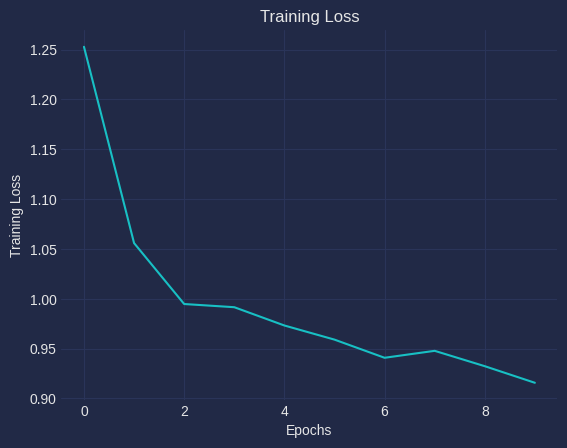

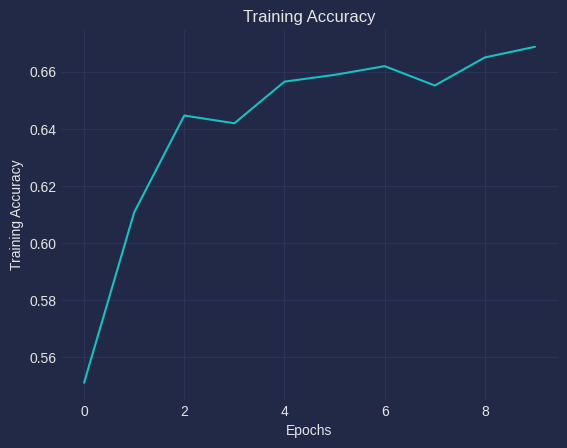

In [ ]:
import matplotlib.pyplot as plt

# Get the training history
loss_history = history.history['loss']
accuracy_history = history.history['accuracy']

# Plot the training loss
plt.plot(range(epochs), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss')
plt.show()

# Plot the training accuracy
plt.plot(range(epochs), accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy')
plt.show()

# Plot the testing accuracy
# plt.plot(range(epochs), history.history['val_accuracy'])
# plt.xlabel('Epochs')
# plt.ylabel('Testing Accuracy')
# plt.title('Testing Accuracy')
# plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the testing set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the metrics
report = classification_report(test_labels, predicted_labels)

# Print the classification report
print(report)


24/24 [==============================] - 19s 789ms/step
              precision    recall  f1-score   support

           0       0.14      0.02      0.04        91
           1       0.33      0.06      0.11        48
           2       0.00      0.00      0.00        51
           3       0.46      0.85      0.60       189
           4       0.88      0.90      0.89       366

    accuracy                           0.67       745
   macro avg       0.36      0.37      0.33       745
weighted avg       0.59      0.67      0.60       745



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Print the correlation matrix
print("Correlation Matrix:")
print(cm)


Correlation Matrix:
[[  2   1   0  81   7]
 [  2   3   0  34   9]
 [  2   1   0  41   7]
 [  4   4   0 161  20]
 [  4   0   0  32 330]]


In [ ]:
import cv2
import numpy as np

# Load the image
image_path = "/content/drive/MyDrive/testt/Copy of 0a3202889f4d.png"
image = cv2.imread(image_path)
image = cv2.resize(image, (img_width, img_height))
image = np.expand_dims(image, axis=0)
image = image / 255.0

# Make predictions on the image
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

# Get the class name for the predicted label
class_name = subfolders[predicted_label]

# Display the result
print("Predicted Class:", class_name)


1/1 [==============================] - 0s 79ms/step
Predicted Class: Moderate


In [ ]:
!pip install autoviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 8.1 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=5d491eef28de6f8e525e4fbdd1cf796d8721fdc900d77f733a23b22c57729fab
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
import os
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class

# Set the path to the main folder containing the subfolders
main_folder_path = "/content/drive/MyDrive/Diabetic Retinopathy 224x224 Gaussian Filtered/gaussian_filtered_images/gaussian_filtered_images"

# Initialize AutoViz class
AV = AutoViz_Class()

# Collect the file paths of all the image files
image_files = []
for root, dirs, files in os.walk(main_folder_path):
    for file in files:
        if file.endswith(".png"):
            image_files.append(os.path.join(root, file))

# Create a DataFrame with a single column containing the file paths
df = pd.DataFrame({"filename": image_files})SS

# Visualize the dataset
AV.AutoViz(filename=None, sep=",", depVar="", dfte=df, header=0, verbose=1, lowess=False,
           chart_format="svg", max_rows_analyzed=None, max_cols_analyzed=None)


In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
import os
import pandas as pd

main_folder_path = "/content/drive/MyDrive/Diabetic Retinopathy 224x224 Gaussian Filtered/gaussian_filtered_images/gaussian_filtered_images"

image_files = []
for root, dirs, files in os.walk(main_folder_path):
    for file in files:
        if file.endswith(".png"):
            image_files.append(os.path.join(root, file))

df = pd.DataFrame({"filename": image_files})

report = sv.analyze(df)
# report.show_html()
# report.show_text()
report.show_notebook()


In [ ]:
import pickle

with open('diabetic.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
### color to grayscale
import cv2
import os
### Load the input image
folder1 = "path of data folder"
folder2 = "new folder path"
for filename in os.listdir(folder1):
    image = cv2.imread(os.path.join(folder1, filename))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(os.path.join(folder2, filename), gray_image)

In [ ]:
### code to crop images
import cv2
import os
### Load the input image
folder1 = "path of data folder"
folder2 = "new folder path"
for filename in os.listdir(folder1):
    image = cv2.imread(os.path.join(folder1, filename))
    x, y, z = image.shape
    new_image = image[0:y, 376:x - 376]
    cv2.imwrite(os.path.join(folder2, filename), new_image)

In [ ]:
import cv2
import os
# Load the input image
folder1 = "C:/Users/Anmol/Desktop/DATASET/TRAIN/O"
folder2 = "C:/Users/Anmol/Desktop/New folder/TRAIN/O/"

for filename in os.listdir(folder1):
    image = cv2.imread(os.path.join(folder1, filename))
    x, y, z = image.shape
    new_image = cv2.resize(image, (128, 128), interpolation = cv2.INTER_CUBIC)
    cv2.imwrite(os.path.join(folder2, filename), new_image)